In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./1645792390_cep1_dataset.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preliminary analysis

## a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [3]:
df.shape

(303, 14)

In [4]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [5]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

1

## b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [9]:
df = df.drop_duplicates()
df.shape

(302, 14)

# 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

## a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [11]:
# check for categorical variables
cat_var = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_var

# there are no categorical variables in the dataset

[]

## c. Study the occurrence of CVD across the Age category

In [12]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

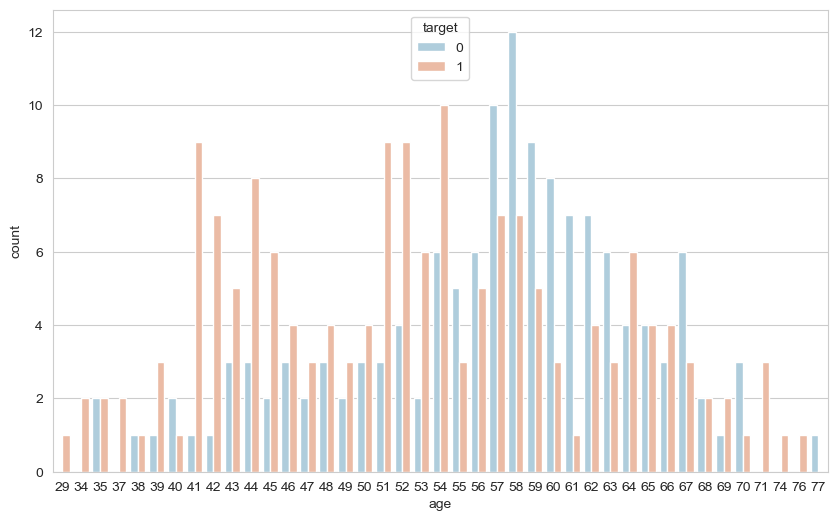

In [13]:
# Study the occurrence of CVD across the Age category
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='age', data=df, hue='target', palette='RdBu_r')

## d. Study the composition of all patients with respect to the Sex category

<AxesSubplot:xlabel='sex', ylabel='count'>

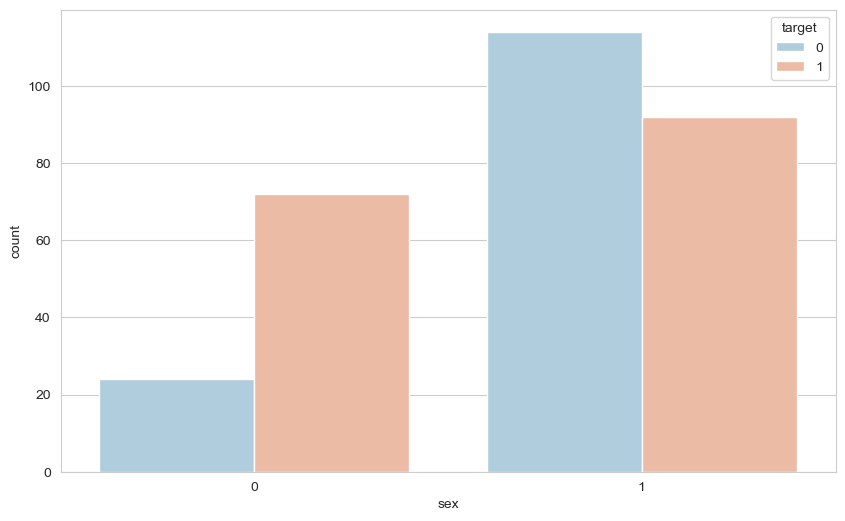

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='sex', data=df, hue='target', palette='RdBu_r')

# around 23 people in the female category don't have cvd and around 70 do have
# around 110 men don't have cvd and around 90 do have

In [15]:
# sum all the male and female patients, male == 1, female == 0
male = df['sex'].value_counts()[1]
female = df['sex'].value_counts()[0]

print(male)
print(female)

206
96


In [16]:
male_cvd = df[df['sex'] == 1]['target'].value_counts(normalize=True).tolist()
female_cvd = df[df['sex'] == 0]['target'].value_counts(normalize=True).tolist()

print(male_cvd)
print(female_cvd)

[0.5533980582524272, 0.44660194174757284]
[0.75, 0.25]


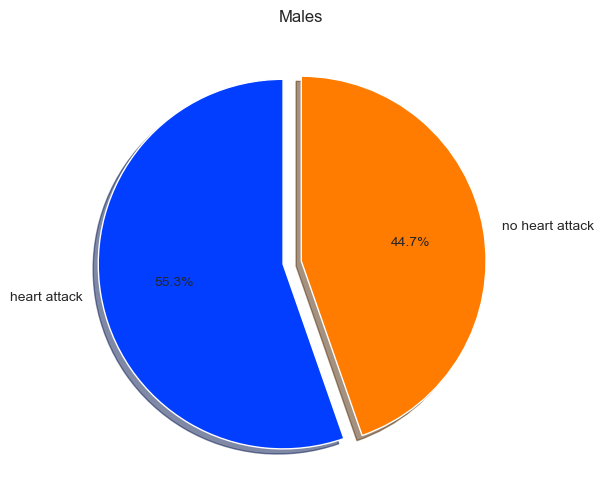

In [17]:
palette_color = sns.color_palette('bright')
explode = [0.1, 0.0]
label = ['heart attack', 'no heart attack']

plt.figure(figsize=(10,6))
plt.title('Males')
plt.pie(male_cvd, labels=label, colors=palette_color, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

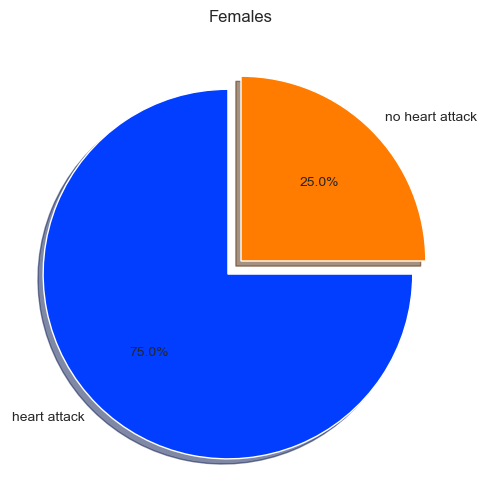

In [18]:
# create a 2 pie chart with a percentage of males and females with cvd
palette_color = sns.color_palette('bright')
explode = [0.1, 0.0]
label = ['heart attack', 'no heart attack']

plt.figure(figsize=(10,6))
plt.title('Females')
plt.pie(female_cvd, labels=label, colors=palette_color, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [19]:
from scipy.stats import ttest_ind

group1 = df[df['target'] == 0]['trestbps']
group2 = df[df['target'] == 1]['trestbps']

t_stat, p_val = ttest_ind(group1, group2)
print('t-statistic: ', t_stat)
print('p-value: ', p_val)


SL = 0.05

if p_val <= SL:
  print('Reject null hypothesis. Resting blood pressure has a significant effect on the risk of CVD')
else:
  print('Fail to reject null hypothesis. Resting blood pressure has no significant effect on the risk of CVD')

t-statistic:  2.5609912831268065
p-value:  0.010926538861949144
Reject null hypothesis. Resting blood pressure has a significant effect on the risk of CVD


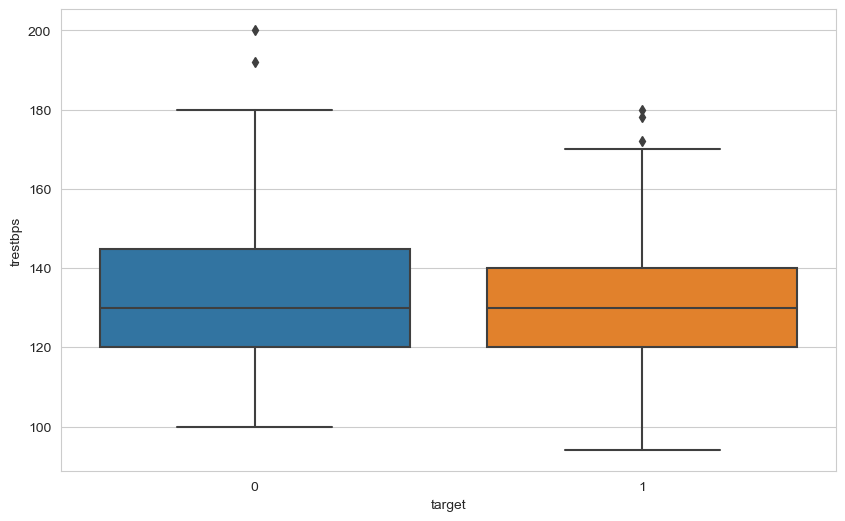

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.show()

#### f. Describe the relationship between cholesterol levels and a target variable

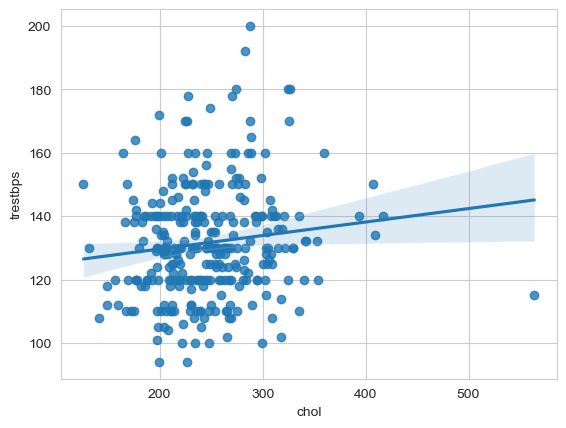

In [21]:
sns.regplot(x='chol', y='trestbps', data=df)
plt.show()

# according to analysis, there is a postive correlation between 
# resting blood pressure and cholesterol. The higher a person's 
# cholesterol, the higher their resting blood pressure.

## g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [22]:
from scipy.stats import ttest_ind

group1 = df[df['target'] == 0]['slope']
group2 = df[df['target'] == 1]['slope']

t_stat, p_val = ttest_ind(group1, group2)
print('t-statistic: ', t_stat)
print('p-value: ', p_val)


SL = 0.05

if p_val <= SL:
  print('Reject null hypothesis. Peak exercising has a significant effect on the risk of CVD')
else:
  print('Fail to reject null hypothesis. Peak exercising has no significant effect on the risk of CVD')

t-statistic:  -6.3442592985331965
p-value:  8.221388831029908e-10
Reject null hypothesis. Peak exercising has a significant effect on the risk of CVD


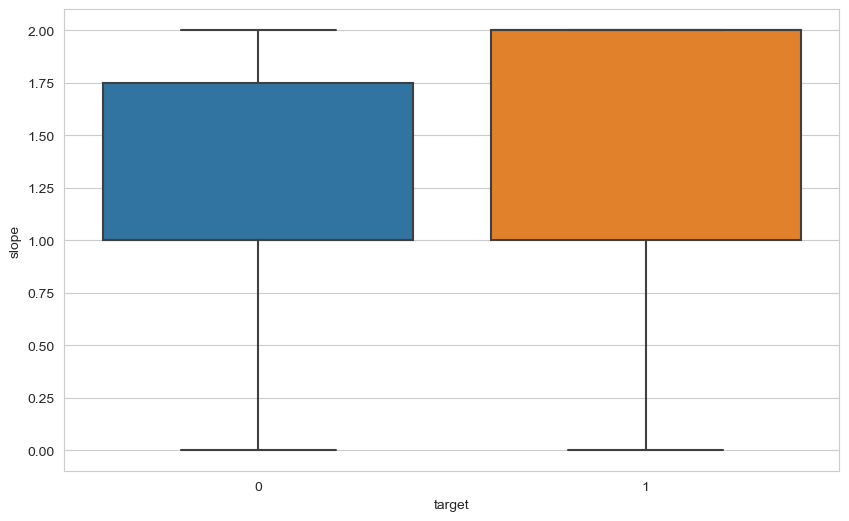

In [23]:
# according to the scatter plot, there is a positive correlation between the target and peak exercising

plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='slope', data=df)
plt.show()

## h. Check if thalassemia is a major cause of CVD

In [24]:
# H0: Thalassemia has no significant effect on the risk of CVD
# H1: Thalassemia has a significant effect on the risk of CVD

In [25]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(df['thalach'], df['target'])

SL = 0.05

if p_value <= SL:
  print('Reject null hypothesis. Thalassemia has a significant effect on the risk of CVD')
else:
  print('Fail to reject null hypothesis. Thalassemia has no significant effect on the risk of CVD')



Reject null hypothesis. Thalassemia has a significant effect on the risk of CVD


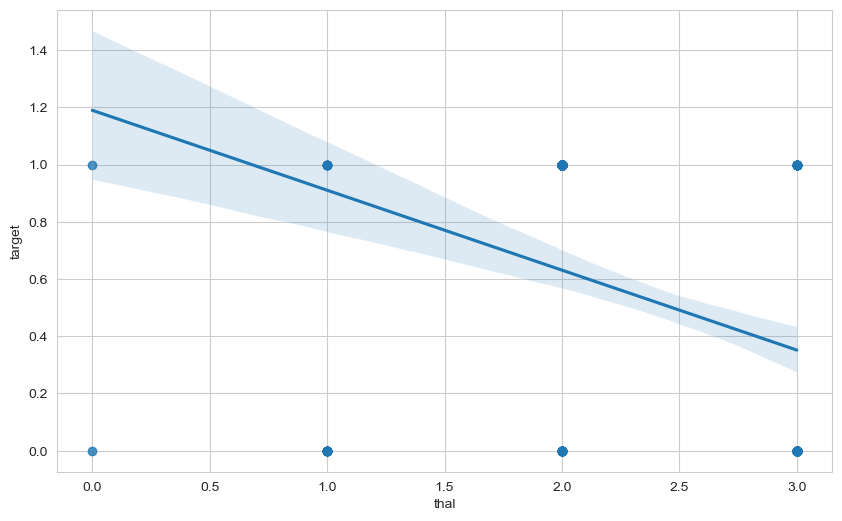

In [26]:
# there is a negative correlation between cvd and thalassemia
plt.figure(figsize=(10,6))
sns.regplot(x='thal', y='target', data=df)
plt.show()

## i. List how the other factors determine the occurrence of CVD

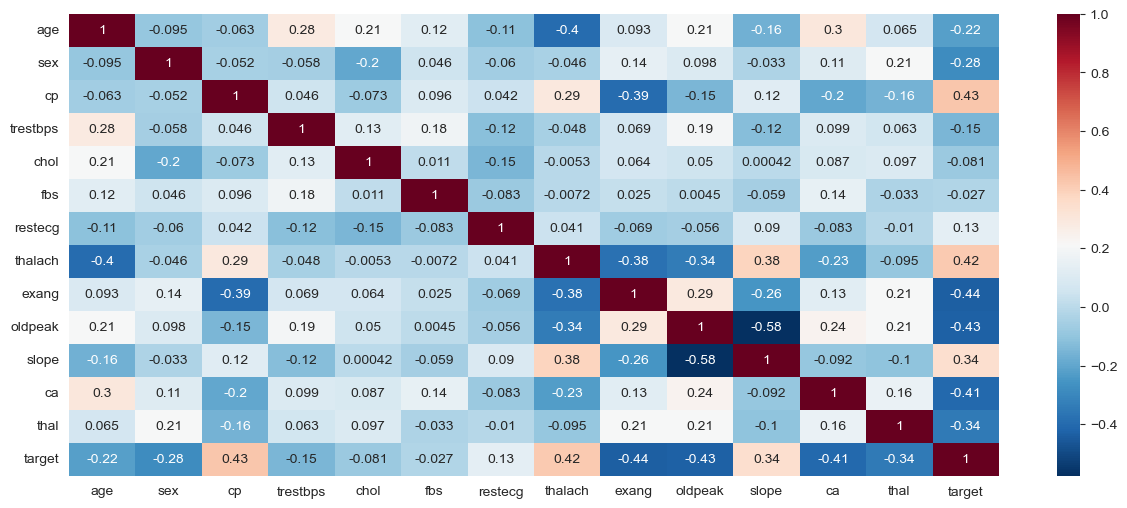

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [28]:
from scipy.stats import ttest_ind

for col in df.columns:
  if col == 'target':
    continue
  
  group1 = df.loc[df[col] == 0, 'target']
  group2 = df.loc[df[col] == 1, 'target']
  t_statistic, p_value = ttest_ind(group1, group2)
  print('{col} p value is:'.format(col=col), p_value)
  # Check if p-value is below a certain significance level
  if p_value < 0.05:
      print("There is a significant difference in the mean of target and {col}.".format(col=col))
  else:
      print("There is no significant difference in the mean of target and {col}.".format(col=col))

  print('\n')

age p value is: nan
There is no significant difference in the mean of target and age.


sex p value is: 5.40243578043211e-07
There is a significant difference in the mean of target and sex.


cp p value is: 7.140481874389058e-13
There is a significant difference in the mean of target and cp.


trestbps p value is: nan
There is no significant difference in the mean of target and trestbps.


chol p value is: nan
There is no significant difference in the mean of target and chol.


fbs p value is: 0.6424070490676506
There is no significant difference in the mean of target and fbs.


restecg p value is: 0.0037797524454055327
There is a significant difference in the mean of target and restecg.


thalach p value is: nan
There is no significant difference in the mean of target and thalach.


exang p value is: 2.0464675890698036e-15
There is a significant difference in the mean of target and exang.


oldpeak p value is: 0.0004214663408805066
There is a significant difference in the mean of targ

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest model and check feature importances
model = RandomForestRegressor()
model.fit(df.drop(columns=['target']), df['target'])
feature_importances = model.feature_importances_
print(feature_importances)
# Check if any feature has importance above a certain threshold
if max(feature_importances) > 0.1:
    print("At least one feature is important for predicting y.")
else:
    print("No feature is important for predicting y.")

[0.07636765 0.02891249 0.20061981 0.06556625 0.07367874 0.0063389
 0.0125342  0.09915781 0.02589834 0.11263441 0.03484455 0.13872116
 0.12472569]
At least one feature is important for predicting y.


## j. Use a pair plot to understand the relationship between all the given variables

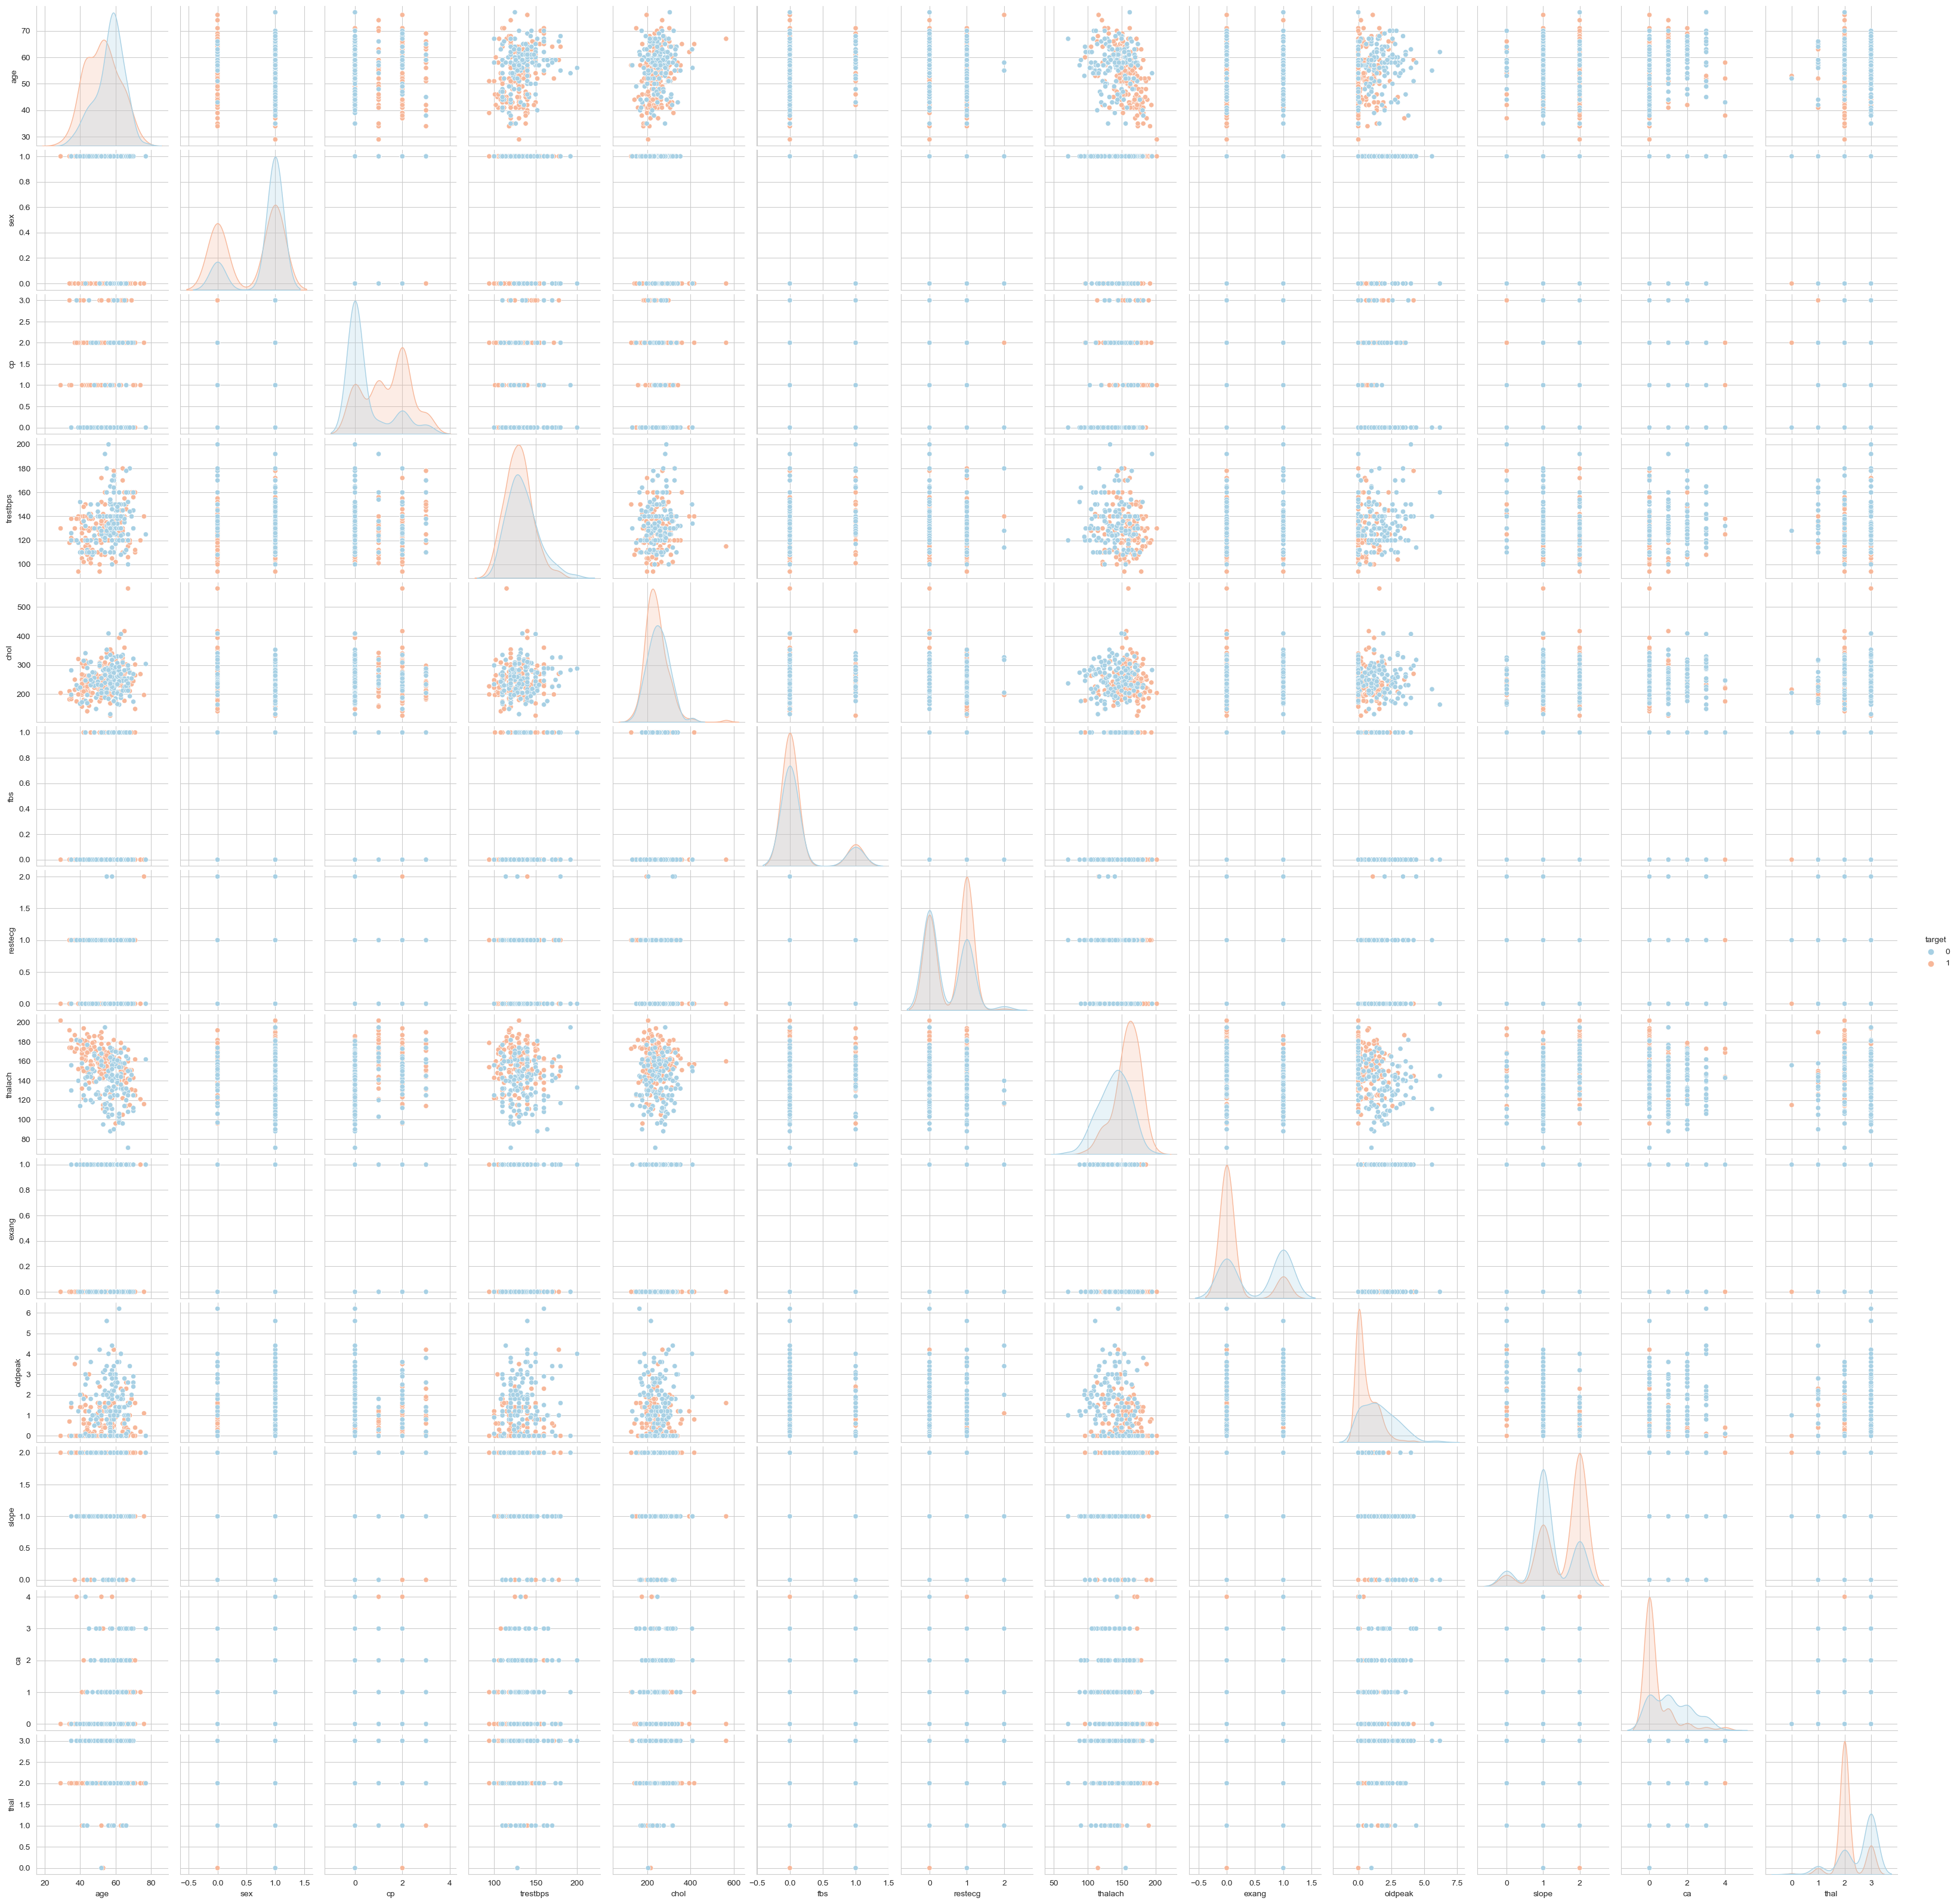

In [30]:
# Use a pair plot to understand the relationship between all the given variables
sns.pairplot(df, hue='target', palette='RdBu_r')

# Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


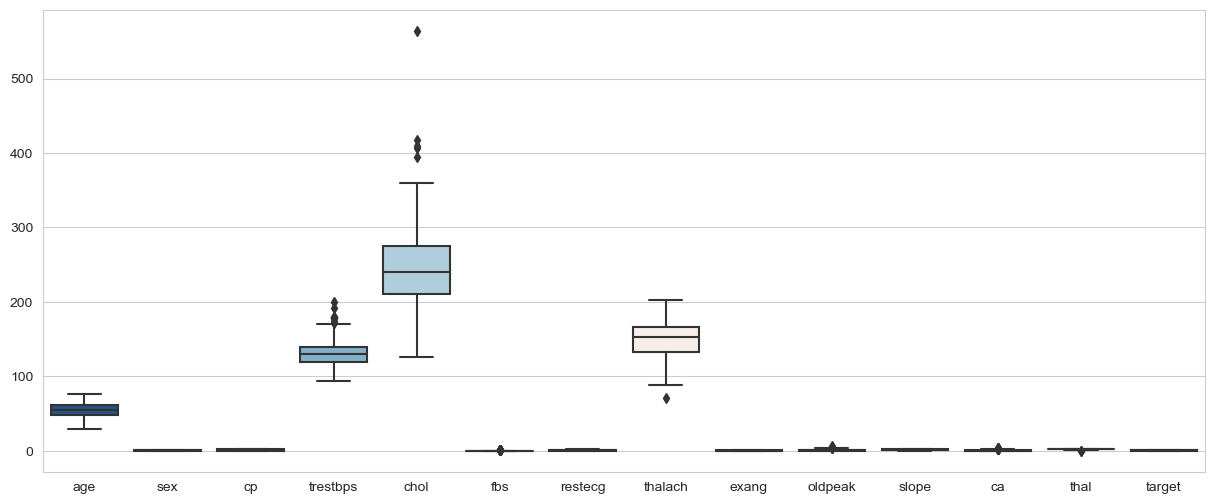

In [31]:
## check for outliers in the df
plt.figure(figsize=(15,6))
sns.boxplot(data=df, palette='RdBu_r')
plt.show()


# Outlier detection and removal

## STD method

In [32]:
from numpy import mean
from numpy import std

outliers_removed_dict = {}
for x in df:
  print(x)
  data_mean, data_std = mean(df[x]), std(df[x])
  print(data_mean)
  print(data_std)
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  outliers = [x for x in df[x] if x < lower or x > upper]
  outliers_removed = [x for x in df[x] if x >= lower and x <= upper]
  print('Identified outliers: %d' % len(outliers))
  print('Non-outlier observations: %d' % len(outliers_removed))
  print('\n')
  outliers_removed_dict[x] = outliers_removed

# Find the length of the longest list
max_len = max(len(x) for x in outliers_removed_dict.values())

# Fill missing values with NaN
outliers_removed_dict = {k: v + [np.nan] * (max_len - len(v)) for k, v in outliers_removed_dict.items()}

# Create DataFrame
outliers_removed_df = pd.DataFrame(outliers_removed_dict)

age
54.420529801324506
9.032977242582097
Identified outliers: 0
Non-outlier observations: 302


sex
0.6821192052980133
0.46565286970190556
Identified outliers: 0
Non-outlier observations: 302


cp
0.9635761589403974
1.0303335436096581
Identified outliers: 0
Non-outlier observations: 302


trestbps
131.60264900662253
17.534291651254144
Identified outliers: 2
Non-outlier observations: 300


chol
246.5
51.66773302324759
Identified outliers: 4
Non-outlier observations: 298


fbs
0.1490066225165563
0.35609499991261434
Identified outliers: 0
Non-outlier observations: 302


restecg
0.5264900662251656
0.5251555413556562
Identified outliers: 0
Non-outlier observations: 302


thalach
149.56953642384107
22.86557606226594
Identified outliers: 1
Non-outlier observations: 301


exang
0.32781456953642385
0.4694168483726081
Identified outliers: 0
Non-outlier observations: 302


oldpeak
1.0430463576158941
1.159527760336097
Identified outliers: 2
Non-outlier observations: 300


slope
1.3973509933774835


## IQR method

In [44]:
data = df
print(data.shape)

for i in data.columns:
  Q1,Q3 = np.percentile(df[i],[25,75])
  IQR = Q3 - Q1
  if IQR == 0:
    print('Skipping outlier removal for column %s: IQR is zero' % x)
    continue

  lr = Q1 - (1.5 * IQR)
  ur = Q3 + (1.5 * IQR)

  data = data[(data[i] >= lr) & (data[i] <= ur)]

data = data.reset_index(drop=True)
print(data.shape)


(302, 14)
Skipping outlier removal for column target: IQR is zero
(261, 14)


In [36]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# normalize the the oldpeak column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['oldpeak'] = scaler.fit_transform(data['oldpeak'].values.reshape(-1,1))
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0.575,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0.875,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0.350,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.200,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.150,2,0,2,1


In [38]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Logistic Regression
for i in range(1,201):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
  model = LogisticRegression(max_iter=1000)

  model.fit(X_train,y_train)
  train_score = model.score(X_train,y_train)
  test_score = model.score(X_test,y_test)
    
  if test_score > train_score:
    print("Test {} Train {} RS {}".format(test_score,train_score,i))

# Random_state 109 gave the best result

### Final model logistic regression

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=109)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9811320754716981
Confusion Matrix: [[14  1]
 [ 0 38]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.99        38

    accuracy                           0.98        53
   macro avg       0.99      0.97      0.98        53
weighted avg       0.98      0.98      0.98        53



In [41]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,201):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  rf = RandomForestClassifier()

  rf.fit(X_train, y_train)
  train_score = model.score(X_train,y_train)
  test_score = model.score(X_test,y_test)

  if test_score > train_score:
    print("Test {} Train {} RS {}".format(test_score,train_score,i))

# Random_state 109 gave the best result

Test 0.9056603773584906 Train 0.8894230769230769 RS 4
Test 0.9245283018867925 Train 0.8846153846153846 RS 5
Test 0.9622641509433962 Train 0.875 RS 8
Test 0.9811320754716981 Train 0.8701923076923077 RS 11
Test 0.9245283018867925 Train 0.8846153846153846 RS 12
Test 0.9433962264150944 Train 0.8798076923076923 RS 13
Test 0.9056603773584906 Train 0.8894230769230769 RS 15
Test 0.9056603773584906 Train 0.8894230769230769 RS 16
Test 0.9056603773584906 Train 0.8894230769230769 RS 19
Test 0.9245283018867925 Train 0.8846153846153846 RS 21
Test 0.9056603773584906 Train 0.8894230769230769 RS 23
Test 0.9056603773584906 Train 0.8894230769230769 RS 26
Test 0.9056603773584906 Train 0.8894230769230769 RS 27
Test 0.9245283018867925 Train 0.8846153846153846 RS 28
Test 0.9056603773584906 Train 0.8894230769230769 RS 32
Test 0.9056603773584906 Train 0.8894230769230769 RS 34
Test 0.9056603773584906 Train 0.8894230769230769 RS 35
Test 0.9245283018867925 Train 0.8846153846153846 RS 37
Test 0.9056603773584906 Tr

### Final model Random Forest Classifier

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=109)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuray:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuray: 0.9433962264150944
Confusion Matrix: [[14  1]
 [ 2 36]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.95      0.96        38

    accuracy                           0.94        53
   macro avg       0.92      0.94      0.93        53
weighted avg       0.95      0.94      0.94        53



In [43]:
import statsmodels.api as sm

features = data.iloc[:, :-1]
label = data.iloc[:,-1]

corr_matrix = data.corr()
corr_matrix['target'].sort_values(ascending=False)

log_model = sm.Logit(label, sm.add_constant(features))
result = log_model.fit()
print(result.summary())

p_values = result.pvalues[1:]
std_errors = result.bse[1:]

p_threshold = 0.05
t_threshold = 1.96

significant_features = []
for i in range(len(p_values)):
  if p_values[i] < p_threshold and abs(result.tvalues[i]) > t_threshold:
    significant_features.append(features.columns[i])

features_selected = features[significant_features]
features_selected.head()

Optimization terminated successfully.
         Current function value: 0.312092
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  261
Model:                          Logit   Df Residuals:                      247
Method:                           MLE   Df Model:                           13
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.5416
Time:                        18:57:22   Log-Likelihood:                -81.456
converged:                       True   LL-Null:                       -177.68
Covariance Type:            nonrobust   LLR p-value:                 4.847e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7320      3.315      1.428      0.153      -1.765      11.229
age            0.0157      0.

,cp,slope,ca,thal
0,3,0,0,1
1,2,0,0,2
2,1,2,0,2
3,1,2,0,2
4,0,2,0,2
